# MMSBM library

## Introduction

## ``nodes_layer`` class

The `nodes_layer` class represents one type of nodes that forms the bipartite network. It can represent people, researchers, papers, metabolites, movies... That depends on your dataset.

The best way to initialize a nodes_layer is from a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
from numba import jit
import sys, os


sys.path.append(r'C:\Users\oscar\OneDrive\Documentos')
import MMSBM_library as sbm


#Dataframe to use
df_politicians =pd.DataFrame( {"legislator":["Pedro", "Santiago", "Alberto", "Yolanda"],
                               "Party":["PSOE", "VOX", "PP", "Sumar"],
                               "Movies_preferences":["Action|Drama","Belic","Belic|Comedy","Comedy|Drama"]})
#Number of groups
K = 9
#You have to tell in which the name of the nodes will be as the second parameter 
politicians = sbm.nodes_layer(K,"legislator",df_politicians)

Numba imported


Once the object is initialized, you can acces to the dataframe from the `df` attribute,but now it will notain a new column with an integer id thet the library will use in the future. The name of the column is the same as the column of the names, but finished in `_id`.

In [2]:
politicians.df

,legislator,Party,Movies_preferences,legislator_id
0,Pedro,PSOE,Action|Drama,1
1,Santiago,VOX,Belic,2
2,Alberto,PP,Belic|Comedy,0
3,Yolanda,Sumar,Comedy|Drama,3


The asignment of the ids with the names of the nodes is in the `dict_codes` attribute.

In [3]:
politicians.dict_codes

{'Pedro': 1, 'Santiago': 2, 'Alberto': 0, 'Yolanda': 3}

This id represents the array position that corresponds to each node for the `theta` and `omega` matricies

You can modify whenever you want the number of groups from the ``K`` attribute.

In [4]:
print(f"Number of groups of politicians: {politicians.K}")
politicians.K = 2
print(f"Number of groups of politicians: {politicians.K}")

Number of groups of politicians: 9
Number of groups of politicians: 2


*WARNING!!!* If yoy change the value of `K` you have to initialize again all the matrices!!

### Adding metadata

When in your dataframe you have extra information about the nodes, you have to tell which columns are metadata and which type of metadata. There are two types of metadata:
 * Exclusive metadata: These are metadata where each node can only have assigned one attribute. For exameple the age of a person. A person only have one age, not more of one.
 * Inclusive metadata: These are metadata where each node can have assigned more of one attributes. For example the genre of a movie, one movie can belong to different genre at the same time.
 

### Exclusive metadata

Once the `nodes_layer` is initialized, you can add the metadata using the `add_exclusive_metadata` method that will return a `exclusive_metadata` class. 

In [5]:
# Importance of the metadata
lambda_party = 100
parties = politicians.add_exclusive_metadata(lambda_party,"Party")

Also, this object will be stored inside the `nodes_layer` object in the `meta_exclusives` attribute that is a dictionary whose keys are the column names of the metadaa and the value the object.

In [6]:
parties == politicians.meta_exclusives["Party"]

True

The value of `lambda_party` is how important will be the metadata while the inference procedure is running and it can be accesed from the `lambda_val` attribute.

In [7]:
print(f"Importance of political parties: {parties.lambda_val}")
parties.lambda_val = 2.3
print(f"Importance of political parties: {parties.lambda_val}")

Importance of political parties: 100
Importance of political parties: 2.3


When the metadata has been added to the `nodes_layer` object, its dataframe will add a new column with the ids of the metadata with the same column name but finished in `_id`.

In [8]:
politicians.df

,legislator,Party,Movies_preferences,legislator_id,Party_id
0,Pedro,PSOE,Action|Drama,1,1
1,Santiago,VOX,Belic,2,3
2,Alberto,PP,Belic|Comedy,0,0
3,Yolanda,Sumar,Comedy|Drama,3,2


Similarly to the `nodes_layer`, you can acces to the metadata ids through the `dict_codes` attribute.

In [9]:
parties.dict_codes

{'PSOE': 1, 'VOX': 3, 'PP': 0, 'Sumar': 2}

### Inclusive metadata

Once the `nodes_layer` is initialized, you can add the metadata using the `add_inclusive_metadata` method that will return a `inclusive_metadata` class. 

In [10]:
# Importance of the metadata
lambda_movies = 0.3
# Number of groups of genres
Tau_movies = 6
movies = politicians.add_inclusive_metadata(lambda_movies,"Movies_preferences",Tau_movies)

Also, this object will be stored inside the `nodes_layer` object in the `meta_inclusives` attribute that is a dictionary whose keys are the column names of the metadaa and the value the object.

In [11]:
politicians.meta_inclusives[str(movies)] == movies

True

The value of `lambda_movies` is how important will be the metadata while the inference procedure is running and it can be accesed from the `lambda_val` attribute.

In [12]:
print(f"Importance of politicians movies preferences: {movies.lambda_val}")
movies.lambda_val = 20
print(f"Importance of politicians movies preferences: {movies.lambda_val}")

Importance of politicians movies preferences: 0.3
Importance of politicians movies preferences: 20


The value of `Tau_movies` is the number of groups which the metadata will be grouped in the inference and it can be accesed from the `lambda_val` attribute.

In [13]:
print(f"Number of groups of politicians: {movies.Tau}")
movies.Tau = 3
print(f"Number of groups of politicians: {movies.Tau}")

Number of groups of politicians: 6
Number of groups of politicians: 3


When the metadata has been added to the `nodes_layer` object, its dataframe will add a new column with the ids of the metadata with the same column name but finished in `_id`.

In [14]:
politicians.df

,legislator,Party,Movies_preferences,legislator_id,Party_id
0,Pedro,PSOE,Action|Drama,1,1
1,Santiago,VOX,Belic,2,3
2,Alberto,PP,Belic|Comedy,0,0
3,Yolanda,Sumar,Comedy|Drama,3,2


Similarly to the `nodes_layer`, you can acces to the metadata ids through the `dict_codes` attribute.

In [15]:
movies.dict_codes

{'Belic': 0, 'Comedy': 1, 'Action': 2, 'Drama': 3}

### Accesing to the metadata object from its name

You can access to the metadata_layer objects without using the `meta_inclusive` and `meta_exclusives` dictionaries.

In [16]:
politicians[str(movies)] == movies

True

In [17]:
politicians[str(parties)] == parties

True

# `BiNet` class

The BinNet class contains the information about a Bipartite network. It contains information about:
 - Each of the layers that forms the bipartite network
 - The observed links.

## `BiNet` class without nodes metadata

To declare a `BiNet` object you need always, at less, a dataframe with (minimum) three columns:
 - One with the source node
 - One with the target node
 - The label of the link

In [18]:
links_df = pd.DataFrame({"source":[0,0,0,1,1,1,2,2,2],
             "target":["A","B","C","A","B","C","A","B","C"],
             "labels":["positive","negative","positive","positive","negative","positive","negative","negative","positive"]})

In [19]:
BiNet = sbm.BiNet(links_df,"labels",nodes_a_name="source",Ka=1,nodes_b_name="target",Kb=2)

Notice that you need to specify wich columns represent nodes and which is the column of the labels.
Also, because the class only distiguish undirect networks, the columns assignments of `nodes_a` and `nodes_b` are irrelevant. Only will affect in the indexing of the matrices of the MMSBM parameters.

Once the object is initialized, you can acces to the dataframe from the `df` attribute, but now it will notain three new columns, one for each node type and another for the labels, with an integer id that the library will use in the future. The name of the column is the same as the column of the names, but finished in `_id`.

In [20]:
BiNet.df

,source,target,labels,labels_id,source_id,target_id
0,0,A,positive,1,0,0
1,0,B,negative,0,0,1
2,0,C,positive,1,0,2
3,1,A,positive,1,1,0
4,1,B,negative,0,1,1
5,1,C,positive,1,1,2
6,2,A,negative,0,2,0
7,2,B,negative,0,2,1
8,2,C,positive,1,2,2


## Accesing to the `node_layer` objects

Two attributes that contains the information of the nodes are the `nodes_a` and `nodes_b` attributes that are `nodes_layer` objects.

In [21]:
print(BiNet.nodes_a,type(BiNet.nodes_a))
print(BiNet.nodes_b,type(BiNet.nodes_b))

source <class 'MMSBM_library.nodes_layer'>
target <class 'MMSBM_library.nodes_layer'>


An easier way to access to these objects is by using the name of the layer:

In [22]:
BiNet["source"] == BiNet.nodes_a

True

In [23]:
BiNet["target"] == BiNet.nodes_b

True

As before, you can access to a dataframe with the `df` method. Also, it will contain an extra column with the ids.

In [24]:
BiNet["source"].df

,source,source_id
0,0,0
1,1,1
2,2,2


In [25]:
BiNet["target"].df

,target,target_id
0,A,0
1,B,1
2,C,2


## Using `nodes_layer` objects to initialize a `BiNet` object

The example of before only has a link list with labels. Sometimes you want to infer using nodes' metadata. The best way to do that is by using `nodes_layer` objects.

First let's create the `nodes_layer` objects

In [26]:
#Dataframe to use
df_politicians =pd.DataFrame( {"legislator":["Pedro", "Santiago", "Alberto", "Yolanda"],
                               "Party":["PSOE", "VOX", "PP", "Sumar"],
                               "Movies_preferences":["Action|Drama","Belic","Belic|Comedy","Comedy|Drama"]})
#Number of groups
K = 2
#You have to tell in which the name of the nodes will be as the second parameter 
politicians = sbm.nodes_layer(K,"legislator",df_politicians)

politicians.add_exclusive_metadata(1,"Party")
politicians.add_inclusive_metadata(1,"Movies_preferences",1)

In [27]:
#Dataframe to use
df_bills =pd.DataFrame( {"bill":["A", "B", "C","D"],
                            "Year":[2020, 2020, 2021, 2022]})
#Number of groups
K = 2
#You have to tell in which the name of the nodes will be as the second parameter 
bills = sbm.nodes_layer(K,"bill",df_bills)

Now we can create the `BiNet` object, but with the difference that instead of specifying the name of the nodes layer, you have to use as a parameter the `nodes_layer` object using the `nodes_a` and `nodes_b` parameters.

In [28]:
#Dataframe to use
df_votes =pd.DataFrame( {"legislator":["Pedro","Pedro","Pedro","Santiago","Santiago","Santiago", 
                                       "Alberto", "Alberto", "Alberto", "Yolanda", "Yolanda", "Yolanda"],
                         "bill":["A", "B", "D",  "A","C", "D",
                                 "A", "B", "C",  "B","C", "D",],
                         "votes":["Yes","No","No",  "No","Yes","Yes",
                                  "No","No","Yes",  "Yes","No","No"]})
#Creating the BiNet object
votes = sbm.BiNet(df_votes,"votes",nodes_a=bills,nodes_b=politicians)

Notice that you do not need to specify the number of the groups of each `nodes_layer` because it is contained in the correspondence `nodes_layer`.

IMPORTANT: The name of the columns of the layer in both Dataframes (from the `nodes_layer` object and for the `BiNet` object) must to coincide. Else, a `KeyError` will arrise.

Is not mandatory to use two `nodes_layer` to create the `BiNet` object when you need metadata from only one of the layers. Remember to specify the number of groups.

In [29]:
#Example using only one nodes_layer object
votes = sbm.BiNet(df_votes,"votes",nodes_a_name="bill",Ka=2,nodes_b=politicians)

If you display the dataframe of the `BinNet` and the `nodes_layer` objects, the nodes ids from both layers will coincide.

In [30]:
display(votes.df[["legislator","legislator_id","bill","bill_id"]])
display(votes["legislator"].df[["legislator","legislator_id"]])
display(votes["bill"].df[["bill","bill_id"]])

,legislator,legislator_id,bill,bill_id
0,Pedro,1,A,0
1,Pedro,1,B,1
2,Pedro,1,D,3
3,Santiago,2,A,0
4,Santiago,2,C,2
5,Santiago,2,D,3
6,Alberto,0,A,0
7,Alberto,0,B,1
8,Alberto,0,C,2
9,Yolanda,3,B,1


,legislator,legislator_id
0,Pedro,1
1,Santiago,2
2,Alberto,0
3,Yolanda,3


,bill,bill_id
0,A,0
1,B,1
2,D,3
3,C,2


# The Expectation Maximization (EM) algorithm

To start to infer the parameters of the MMSBM, you have to initialize the parameters. It can be easily done with the `init_EM` method.

In [31]:
votes.init_EM()

Once the EM have been initialized, the parameters will be stored in attributes. For the membership parameters, each `nodes_layer` will have a `theta` attribute that is a matrix.

In [32]:
votes["legislator"].theta

array([[0.97854001, 0.02145999],
       [0.5381667 , 0.4618333 ],
       [0.54037313, 0.45962687],
       [0.16977574, 0.83022426]])

In [33]:
votes["bill"].theta

array([[0.42520841, 0.57479159],
       [0.62985892, 0.37014108],
       [0.14547109, 0.85452891],
       [0.51793374, 0.48206626]])

The first index corresponds to the id of the node, the second correspond to the group number.

For the `BiNet` object, the probabilities matrix and the expectation parameters will be stored in the `pkl` and `omega` attributes respectivly

In [34]:
votes.pkl

array([[[0.21681093, 0.78318907],
        [0.60822987, 0.39177013]],

       [[0.08532114, 0.91467886],
        [0.99827444, 0.00172556]]])

The first and second index corresponds to the groups from `nodes_a` and `nodes_b` respectively. The third correspond to the label id.

In [35]:
votes.omega

array([[[[5.78038769e-01, 3.55626735e-02],
         [3.07497073e-01, 7.89014852e-02]],

        [[3.32163193e-01, 1.42588546e-01],
         [5.24399294e-01, 8.48967808e-04]],

        [[1.08551931e-01, 2.59021482e-01],
         [5.77459554e-02, 5.74680631e-01]],

        [[0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00]]],


       [[[7.39578293e-01, 4.55010681e-02],
         [1.71034456e-01, 4.38861824e-02]],

        [[1.67765775e-01, 4.03885587e-01],
         [3.87974179e-02, 3.89551220e-01]],

        [[0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00]],

        [[2.41615437e-01, 5.91029508e-01],
         [1.65825268e-01, 1.52978777e-03]]],


       [[[1.27037423e-01, 1.39362926e-03],
         [8.71532890e-01, 3.60574785e-05]],

        [[0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00]],

        [[1.20526540e-01, 5.12813046e-02],
         [8.26865350e-01, 1.32680519e-03]],

        [[6.69822700e-03, 9.

The first and second index corresponds to the nodes id from `nodes_a` and `nodes_b` respectively. The second and third index corresponds to the groups from `nodes_a` and `nodes_b` respectively.

## Runing the EM algorithm and checking the convergence

To run the EM algorithm, you have to use the `EM_step` method. It will make an iteration of the algorithm by default. You can specify the number of iterations with the `N_steps` parameter. To check the convergence, you can use the `converges` method.

In [36]:
N_itt = 100
N_check = 5 #Number of iterations to measure the convergence

for itt in range(N_itt//N_check):
    votes.EM_step(N_check)
    converges = votes.converges()
    print(f"Iteration {itt*N_check}: {converges}")
    if converges:
        break

Iteration 0: False
Iteration 5: False
Iteration 10: False
Iteration 15: False
Iteration 20: False
Iteration 25: False
Iteration 30: False
Iteration 35: False
Iteration 40: False
Iteration 45: True


# Using training sets and test sets

You can select a training set instead of using all the links to infer the parameters. You can do that using the `training` parameter when you initialize the EM algorithm. 

This parameter can be a list of the links ids that you want to use as a training set, another dataframe with more links.If not specified, all the links will be used.

In [37]:
from sklearn.model_selection import train_test_split

#Defining the training and test sets
df_train, df_test = train_test_split(votes.df, test_size=0.2)


#Initializing the EM algorithm with the training set
votes.init_EM(training=df_train)

#Running the EM algorithm
N_itt = 100
N_check = 5 #Number of iterations to measure the convergence
for itt in range(N_itt//N_check):
    votes.EM_step(N_check)
    converges = votes.converges()
    print(f"Iteration {itt*N_check}: converges? {converges}")
    if converges:
        break

Iteration 0: converges? False
Iteration 5: converges? False
Iteration 10: converges? False
Iteration 15: converges? False
Iteration 20: converges? False
Iteration 25: converges? False
Iteration 30: converges? False
Iteration 35: converges? False
Iteration 40: converges? False
Iteration 45: converges? True


In [38]:
votes.get_accuracy()

1.0

## Checking the accuracy and getting predictions

Once the EM algorithm has converged, you can get the predictions using the `get_predicted_labels` method. You can spicify which links you want to infer its labels with the `links` parameters. If no links are specified, it will use the links used for training the model.

In [39]:
votes.get_predicted_labels()

,bill,legislator,Predicted votes
0,A,Alberto,No
1,B,Yolanda,Yes
2,C,Yolanda,No
3,D,Yolanda,No
4,D,Santiago,Yes
5,D,Pedro,No
6,C,Santiago,Yes
7,C,Alberto,Yes
8,B,Alberto,No


In [40]:
df_test

,legislator,bill,votes,votes_id,bill_id,legislator_id
1,Pedro,B,No,0,1,1
3,Santiago,A,No,0,0,2
0,Pedro,A,Yes,1,0,1


In [41]:
votes.get_predicted_labels(links=df_test)

,legislator,bill,votes,votes_id,bill_id,legislator_id,Predicted votes
1,Pedro,B,No,0,1,1,Yes
3,Santiago,A,No,0,0,2,No
0,Pedro,A,Yes,1,0,1,Yes


In [42]:
help(votes.get_accuracy)

Help on method get_accuracy in module MMSBM_library:

get_accuracy(predicted_labels=None, test_labels=None, Pij=None, links=None, estimator='max_probability') method of MMSBM_library.BiNet instance
    Computes the ratio of correctly predicted labels of the model given the MMSBM parameters. They can be measured by different estimators:
        -max_probability: The predicted label will be the most plausible label
        -mean: The predicted label will be the mean
    
    Parameters
    ----------
    predicted_labels: array-like, default:None.
        Array-like with the predicted labels ids given by the MMSBM. If None, predictions will be generated using
    the specified links and estimator.
    
    test_labels: array-like, default:None.
        List or array with the observed labels. If None, labels from self.labels_array are taken given pos_test_labels
    
    links: ndarray of 1 or 2 dimensions, pandas DataFrame, default: None
        Array with links for which label probabili

### Checking the accuracy

You can check the accuracy of the predictions using the `get_accuracy` method. By default, it will compute the accuracy of the training set. You can specify the test set with the `links` parameter, by using a list of the links ids or another dataframe with other links.

In [43]:
#Accuracy of the training set
print(f"Accuracy of the training set: {votes.get_accuracy()}")
print(f"Accuracy of the test set: {votes.get_accuracy(links=df_test)}")

Accuracy of the training set: 1.0
Accuracy of the test set: 0.6666666666666666


# Saving and loading the parameters

For long runs or for using the parameters later, you can save the parameters. It is very important to notice that also is important to save the ids of the nodes and labels, and some information of the nodes_layer and BiNet objects before initializing the EM algorithm. To save the parameters you can use the `save_nodes_layer` and `save_BiNet` methods.

## The ``save_nodes_layer`` method

In [44]:
help(sbm.nodes_layer.save_nodes_layer)

Help on function save_nodes_layer in module MMSBM_library:

save_nodes_layer(self, dir='.')
    It saves the nodes_layer object
    
    Parameters
    -----------
    dir: str
        Directory where the json with the nodes_layer information will be saved



This method is useful  when you only want to save the information of a `nodes_layer` object. One example can be when you want to do a 5-fold cross-validation, instead of saving the nodes information  for each fold, you can save it once and load it later once for all the folds.

The name of the JSON will be `layer_{nodes_layer.name}_data.json`

In [45]:
try:
    os.mkdir("tutorial_saves")
    os.mkdir("tutorial_saves/example_BiNet")
except:
    pass

#saving data about the nodes layers
politicians.save_nodes_layer("tutorial_saves/example_BiNet")
bills.save_nodes_layer("tutorial_saves/example_BiNet")

## The ``save_BiNet`` method

In [46]:
help(votes.save_BiNet)

Help on method save_BiNet in module MMSBM_library:

save_BiNet(dir='.', layers=True) method of MMSBM_library.BiNet instance
    It saves the BiNet data into a JSON file in dir. If layers==True,
    it saves the nodes_layer objects in JSONs files in the same directory.
    
    Parameters
    -----------
    dir: str
        Directory where the JSON with the BiNet information will be saved
    layers: bool, default: True
        If True, it saves the nodes_layer objects in JSONs files in the same directory.



The method will save with the ids of the nodes, metadata and labels in a JSON file. Also, in this file, it will be stored. The name of the file will be BiNet_data.json.

This method can also save in the same directory the nodes_layer objects that are in the BiNet object when ``layers=True``. In the JSON file, elemental information of the nodes_layer objects will be stored, just in case you don´t use metadata for a specific layer.  

Here an example using both methods for saving using the EM algorith from before

This method can also save in the same directory the nodes_layer objects that are in the BiNet object when ``layers=True``. In the JSON file, elemental information of the nodes_layer objects will be stored, just in case you don´t use metadata for a specific layer.  


In [47]:

N_check = 5 #Number of iterations to measure the convergence
try:
    os.mkdir("tutorial_saves")
    os.mkdir("tutorial_saves/example_BiNet")
except:
    pass

votes.save_BiNet("tutorial_saves/example_BiNet/")


## Saving the parameters with ``save_MMSBM_parameters`` function

To save the parameters of the EM procedure, you can use the ``save_MMSBM_parameters`` function:

In [48]:
from MMSBM_library.functions.utils import save_MMSBM_parameters

In [49]:
help(save_MMSBM_parameters)

Help on function save_MMSBM_parameters in module MMSBM_library.functions.utils:

save_MMSBM_parameters(BiNet, dir='.', matrix_format='npy', BiNet_json=False)
    It saves the parameters into matrices in the dir directory
    
    Parameters:
    -----------
    BiNet: BiNet object
        Bipartite network with the MMSBM initialized
    
    dir: str, default: "."
        Directory where the files with the MMSBM parameters will be saved
    
    matrix_format: str, default: npy
        Format that the matrices parameters will be saved. It can be, npy or npz.
    
    BiNet_json: boolean, default: False
        If it is True, the information of the BiNet class will be saved into a json.



In [50]:
from sklearn.model_selection import train_test_split


try:
    os.mkdir("tutorial_saves")
    os.mkdir("tutorial_saves/example_BiNet")
    os.mkdir("tutorial_saves/example_parameters")
except:
    pass

#Defining the training and test sets
df_train, df_test = train_test_split(votes.df, test_size=0.2)



votes.save_BiNet("./tutorial_saves/example_BiNet/")

#Initializing the EM algorithm with the training set
votes.init_EM(training=df_train)

#Running the EM algorithm
N_itt = 100
N_check = 5 #Number of iterations to measure the convergence
for itt in range(N_itt//N_check):
    votes.EM_step(N_check)
    converges = votes.converges()
    print(f"Iteration {itt*N_check}: converges? {converges}")
    if converges:
        save_MMSBM_parameters(votes,"./tutorial_saves/example_parameters")
        break

Iteration 0: converges? False
Iteration 5: converges? False
Iteration 10: converges? False
Iteration 15: converges? False
Iteration 20: converges? False
Iteration 25: converges? False
Iteration 30: converges? False
Iteration 35: converges? False
Iteration 40: converges? False
Iteration 45: converges? False


Iteration 50: converges? False
Iteration 55: converges? False
Iteration 60: converges? False
Iteration 65: converges? False
Iteration 70: converges? False
Iteration 75: converges? True


In [ ]:
votes.EM_step()

Now different `.npy` files have been created inside `example_parameters` folder:
 - `theta_a.npy` and `theta_b.npy` contain the parameters of the `nodes_layer` objects that form the `BiNet` object.
 - `pkl.npy` contains the membership probabilities.
 - For each exclusive metadata it will generate:
   - `qka_{meta_name}.npy` with the membership probability for each metadata.
 - For each inclusive metadata it will generate:
   - `q_k_tau_{meta_name}.npy` with the membership probability for each metadata.
   - `zeta_{meta_name}.npy` with the membership factors for each metadata.

## The ``load_BiNet_from_json`` and the ``init_EM_from_directory`` methods: 

Also, you can load your saved `BiNet` class using the `load_BiNet_from_json` class method:

In [52]:
help(sbm.BiNet.load_BiNet_from_json)

Help on method load_BiNet_from_json in module MMSBM_library:

load_BiNet_from_json(json_file, links, links_label, *, nodes_a=None, nodes_b=None, nodes_a_dir=None, nodes_b_dir=None, separator='\t') method of builtins.type instance
    Load a BiNet instance from a JSON file containing MMSBM parameters and link information.
    
    Parameters
    ----------
    json_file: str
        Path to the JSON files containing MMSBM parameters.
    
    links: str, pandas DataFrame
        DataFrame or directory containing the links between nodes_a and nodes_b and their labels.
    
    links_label: array-like
        Array-like object representing the labels corresponding to the links.
    
    nodes_a: nodes_layer, str, pd.DataFrame, None, default: None
        - If nodes_layer: Existing instance of the nodes_layer class representing the first layer.
        - If str or pd.DataFrame: If str, a name for the first layer. If pd.DataFrame, DataFrame with nodes and attributes.
        - If None: The 

In [53]:
loaded_votes = sbm.BiNet.load_BiNet_from_json("./tutorial_saves/example_BiNet/BiNet_data.json",
                                              links=df_votes,links_label = "votes",
                                              nodes_a=bills,nodes_b=politicians)

If you want to load the parameters  obtained from a EM procedure to continue the procedure or to analyze the parameters you have to use the  `init_EM_from_directory` method.

In [54]:
help(loaded_votes.init_EM_from_directory)

Help on method init_EM_from_directory in module MMSBM_library:

init_EM_from_directory(training=None, dir='.') method of MMSBM_library.BiNet instance
    Initialize the Expectation Maximization (EM) algorithm to obtain the most plausible membership parameters of the
    Mixed-Membership Stochastic Block Model (MMSBM) using parameters saved in files located in a specified directory.
    
        Parameters
        ----------
        dir: str, default: "."
            Directory where the files with the MMSBM parameters will be loaded.
    
        training: pd.DataFrame, list, ndarray, default: None
            - If pd.DataFrame: DataFrame containing the training links and labels.
            - If list or ndarray: List or array containing the positions of the links list from self.df attribute.
            - If None: Uses self.links_training and self.labels_training.



In [55]:
loaded_votes.init_EM_from_directory(dir="./tutorial_saves/example_parameters",training=df_train)

From here you can continue the EM procedure using the `EM_step` method:


In [56]:
loaded_votes.df

,legislator,bill,votes,votes_id,bill_id,legislator_id
0,Pedro,A,Yes,1,0,1
1,Pedro,B,No,0,1,1
2,Pedro,D,No,0,3,1
3,Santiago,A,No,0,0,2
4,Santiago,C,Yes,1,2,2
5,Santiago,D,Yes,1,3,2
6,Alberto,A,No,0,0,0
7,Alberto,B,No,0,1,0
8,Alberto,C,Yes,1,2,0
9,Yolanda,B,Yes,1,1,3


In [57]:
loaded_votes.EM_step(10)

Or analyze the parameters and/or links and/or accuracies:

In [58]:
loaded_votes.df

,legislator,bill,votes,votes_id,bill_id,legislator_id
0,Pedro,A,Yes,1,0,1
1,Pedro,B,No,0,1,1
2,Pedro,D,No,0,3,1
3,Santiago,A,No,0,0,2
4,Santiago,C,Yes,1,2,2
5,Santiago,D,Yes,1,3,2
6,Alberto,A,No,0,0,0
7,Alberto,B,No,0,1,0
8,Alberto,C,Yes,1,2,0
9,Yolanda,B,Yes,1,1,3


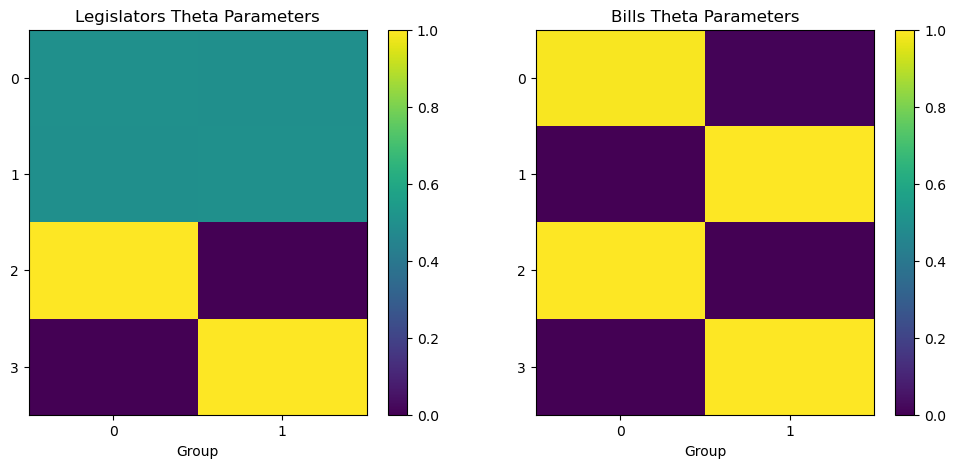

In [59]:
# Plotting the membership matrices of the politician and the votes
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plot theta parameters for both nodes as heatmaps
im1 = ax1.imshow(loaded_votes.nodes_a.theta, cmap='viridis', aspect='auto')
im2 = ax2.imshow(loaded_votes.nodes_b.theta, cmap='viridis', aspect='auto')

# Add colorbars
plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)

# Set titles
ax1.set_title('Legislators Theta Parameters')
ax2.set_title('Bills Theta Parameters')

# Label axes
ax1.set_xlabel('Group')
ax2.set_xlabel('Group')

# Set y-tick labels to node IDs
ax1.set_yticks(range(len(politicians.df["legislator_id"])))
ax1.set_yticklabels(range(len(politicians.df["legislator_id"])))
ax2.set_yticks(range(len(bills.df["bill_id"])))
ax2.set_yticklabels(range(len(bills.df["bill_id"])))



ax1.set_xticks(range(politicians.K))
ax2.set_xticks(range(bills.K))

